In [2]:
import pandas as pd
import seaborn as sns
import datetime as dt

In [25]:
df = pd.read_csv('NYPD_Shootings.csv', index_col=0, parse_dates=['OCCUR_DATE'])

In [26]:
df.sort_values('OCCUR_DATE').head(5)

,OCCUR_DATE,OCCUR_TIME,BORO,PRECINCT,JURISDICTION_CODE,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat
INCIDENT_KEY,,,,,,,,,,,,,,,,,,
9953252,2006-01-01,2:22:00,MANHATTAN,28,0.0,NONE,True,25-44,M,BLACK,25-44,M,BLACK,998816,233545,40.807699,-73.947385,POINT (-73.94738485799998 40.807699163000045)
9953246,2006-01-01,5:51:00,BRONX,44,0.0,NONE,False,25-44,M,WHITE HISPANIC,18-24,M,WHITE HISPANIC,1007418,243859,40.835990,-73.916276,POINT (-73.91627635999998 40.83598980000005)
139716503,2006-01-01,12:30:00,BROOKLYN,77,0.0,PVT HOUSE,True,NaN,NaN,NaN,25-44,M,BLACK,996442,184160,40.672153,-73.956050,POINT (-73.95604992899997 40.67215322100003)
9953245,2006-01-01,2:00:00,BRONX,48,0.0,NONE,False,18-24,M,BLACK,<18,M,BLACK,1013405,251801,40.857771,-73.894606,POINT (-73.89460587699995 40.85777050600007)
9953247,2006-01-01,3:30:00,BROOKLYN,67,0.0,NaN,False,UNKNOWN,U,UNKNOWN,18-24,M,BLACK,999316,176460,40.651014,-73.945707,POINT (-73.94570651699998 40.651013998000046)


In [27]:
df.sort_values('OCCUR_DATE', ascending=True).tail(2)

,OCCUR_DATE,OCCUR_TIME,BORO,PRECINCT,JURISDICTION_CODE,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat
INCIDENT_KEY,,,,,,,,,,,,,,,,,,
222468112,2020-12-31,14:59:00,QUEENS,103,0.0,NaN,False,NaN,NaN,NaN,18-24,M,BLACK,1013251,243005,40.833629,-73.895201,POINT (-73.89520062899999 40.833628590000046)
222466833,2020-12-31,19:27:00,QUEENS,113,0.0,NaN,True,NaN,NaN,NaN,25-44,M,BLACK,999880,190399,40.689272,-73.943642,POINT (-73.94364165399996 40.68927245800006)


In [28]:
display(df.dtypes)
display(df.columns)


OCCUR_DATE                 datetime64[ns]
OCCUR_TIME                         object
BORO                               object
PRECINCT                            int64
JURISDICTION_CODE                 float64
LOCATION_DESC                      object
STATISTICAL_MURDER_FLAG              bool
PERP_AGE_GROUP                     object
PERP_SEX                           object
PERP_RACE                          object
VIC_AGE_GROUP                      object
VIC_SEX                            object
VIC_RACE                           object
X_COORD_CD                         object
Y_COORD_CD                         object
Latitude                          float64
Longitude                         float64
Lon_Lat                            object
dtype: object

Index(['OCCUR_DATE', 'OCCUR_TIME', 'BORO', 'PRECINCT', 'JURISDICTION_CODE',
       'LOCATION_DESC', 'STATISTICAL_MURDER_FLAG', 'PERP_AGE_GROUP',
       'PERP_SEX', 'PERP_RACE', 'VIC_AGE_GROUP', 'VIC_SEX', 'VIC_RACE',
       'X_COORD_CD', 'Y_COORD_CD', 'Latitude', 'Longitude', 'Lon_Lat'],
      dtype='object')

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


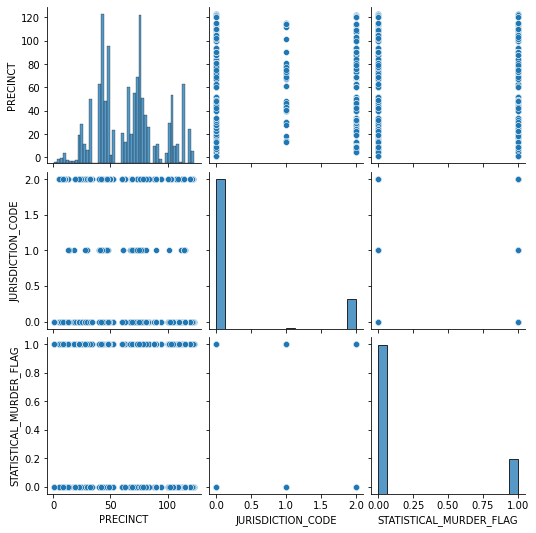

In [7]:
sns.pairplot(df[['BORO', 'PRECINCT', 'JURISDICTION_CODE',
       'LOCATION_DESC', 'STATISTICAL_MURDER_FLAG', 'PERP_AGE_GROUP',
       'PERP_SEX', 'PERP_RACE', 'VIC_AGE_GROUP', 'VIC_SEX', 'VIC_RACE']])

In [8]:
df['BORO'].unique()

array(['QUEENS', 'BRONX', 'MANHATTAN', 'STATEN ISLAND', 'BROOKLYN'],
      dtype=object)

In [9]:
df.shape

(23568, 18)

In [10]:
df.loc[df['STATISTICAL_MURDER_FLAG'] == True].shape

(4488, 18)

In [11]:
df.shape

(23568, 18)

In [14]:
vic_race_count = df['VIC_RACE'].value_counts().to_dict()
vic_race_count

{'BLACK': 16846,
 'WHITE HISPANIC': 3432,
 'BLACK HISPANIC': 2244,
 'WHITE': 615,
 'ASIAN / PACIFIC ISLANDER': 320,
 'UNKNOWN': 102,
 'AMERICAN INDIAN/ALASKAN NATIVE': 9}

In [15]:
perp_race_count = df['PERP_RACE'].value_counts().to_dict()
perp_race_count

{'BLACK': 9855,
 'WHITE HISPANIC': 1961,
 'UNKNOWN': 1869,
 'BLACK HISPANIC': 1081,
 'WHITE': 255,
 'ASIAN / PACIFIC ISLANDER': 120,
 'AMERICAN INDIAN/ALASKAN NATIVE': 2}

In [16]:
vic_sex_count = df['VIC_SEX'].value_counts().to_dict()
vic_sex_count

{'M': 21353, 'F': 2195, 'U': 20}

In [17]:
perp_sex_count = df['PERP_SEX'].value_counts().to_dict()
perp_sex_count

{'M': 13305, 'U': 1504, 'F': 334}